In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import twitter_samples

Source: https://predictivehacks.com/how-to-run-sentiment-analysis-in-python-using-vader/

In [2]:
nltk.download('twitter_samples')
nltk.download('vader_lexicon')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\tigi\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tigi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# get 5000 positive and negative tweets
all_positive_tweets =  twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

Creating the SentimentIntensityAnalyzer object

In [6]:
analyzer = SentimentIntensityAnalyzer()

Picking one example tweet out of all positive tweets

In [7]:
all_positive_tweets[100]

"@metalgear_jp @Kojima_Hideo I want you're T-shirts ! They are so cool ! :D"

Getting the sentiment Score for this specific tweet:

In [8]:
analyzer.polarity_scores(all_positive_tweets[100])

{'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'compound': 0.8476}

Jetzt ein Beispiel mit einem negativen Tweet:

In [9]:
all_negative_tweets[20]

'I feel lonely someone talk to me guys and girls :(\n\n@TheOnlyRazzYT @imarieuda @EiroZPegasus @AMYSQUEE @UdotV'

In [11]:
analyzer.polarity_scores(all_negative_tweets[20])

{'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'compound': -0.6597}

## Creating a Dataframe with the corresponding label

In [4]:
df_negative_tweets = pd.DataFrame({"tweets":all_negative_tweets,"label":0})

In [5]:
df_negative_tweets

,tweets,label
0,hopeless for tmr :(,0
1,Everything in the kids section of IKEA is so c...,0
2,@Hegelbon That heart sliding into the waste ba...,0
3,"“@ketchBurning: I hate Japanese call him ""bani...",0
4,"Dang starting next week I have ""work"" :(",0
...,...,...
4995,I wanna change my avi but uSanele :(,0
4996,MY PUPPY BROKE HER FOOT :(,0
4997,where's all the jaebum baby pictures :((,0
4998,But but Mr Ahmad Maslan cooks too :( https://t...,0


In [6]:
df_positive_tweets = pd.DataFrame({"tweets":all_positive_tweets, "label":1})

In [7]:
df_positive_tweets

,tweets,label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1
...,...,...
4995,"@chriswiggin3 Chris, that's great to hear :) D...",1
4996,@RachelLiskeard Thanks for the shout-out :) It...,1
4997,@side556 Hey! :) Long time no talk...,1
4998,@staybubbly69 as Matt would say. WELCOME TO AD...,1


In [8]:
df_all_tweets = pd.concat([df_positive_tweets,df_negative_tweets])

In [9]:
df_all_tweets

,tweets,label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1
...,...,...
4995,I wanna change my avi but uSanele :(,0
4996,MY PUPPY BROKE HER FOOT :(,0
4997,where's all the jaebum baby pictures :((,0
4998,But but Mr Ahmad Maslan cooks too :( https://t...,0


In [11]:
df_all_tweets.to_csv("tweets.csv",sep=",", index=False)

## Performing Sentiment-Analysis for all samples

In [20]:
df_all_tweets['neg'] = df_all_tweets.tweets.apply(lambda x:analyzer.polarity_scores(x)['neg'])
df_all_tweets['neu'] = df_all_tweets.tweets.apply(lambda x:analyzer.polarity_scores(x)['neu'])
df_all_tweets['pos'] = df_all_tweets.tweets.apply(lambda x:analyzer.polarity_scores(x)['pos'])
df_all_tweets['compound'] = df_all_tweets.tweets.apply(lambda x:analyzer.polarity_scores(x)['compound'])
df_all_tweets.head()

,tweets,label,neg,neu,pos,compound
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,0.000,0.615,0.385,0.7579
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,0.145,0.585,0.270,0.6229
2,@DespiteOfficial we had a listen last night :)...,1,0.000,0.706,0.294,0.7959
3,@97sides CONGRATS :),1,0.000,0.123,0.877,0.7983
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,0.000,0.718,0.282,0.7950


## Analyzing the results

In [21]:
df_all_tweets.groupby('label')['compound'].describe() ## Get the five-number-summary for the compound score for each label

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,5000.0,-0.265929,0.425569,-0.9686,-0.5719,-0.4404,0.000,0.9781
1,5000.0,0.579837,0.305246,-0.9576,0.4588,0.6597,0.802,0.9872


<AxesSubplot:title={'center':'compound'}, xlabel='label'>

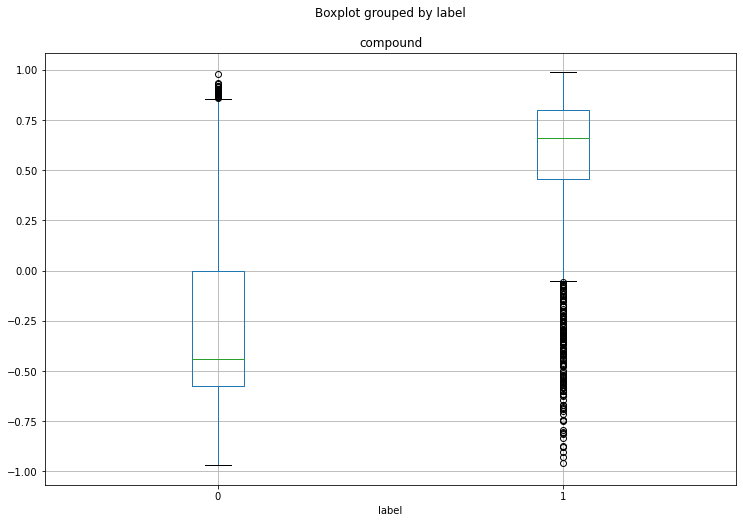

In [22]:
df_all_tweets.boxplot(by='label', column='compound', figsize=(12,8))